# Progetto PAA a.a 2016/2017

Autore:
<ul>
<li>Tommaso Ceccarini, 6242250 <a href="mailto:tommaso.ceccarini1@stud.unifi.it">tommaso.ceccarini1@stud.unifi.it</a> </li>
</ul>

<h3>Introduzione</h3>
In questo notebook verranno eseguite alcune verifiche numeriche relative le seguenti identità
$$\sum_{k=0}^{n}\binom{2k}{k}\binom{2(n-k)}{n-k} = 4^n$$
$$\sum_{k=0}^{n}(-1)^n\binom{2k}{k}\binom{2(n-k)}{n-k} = \begin{cases}
    2^n \binom{n}{\frac{n}{2}}       & \quad \text{se } n \text{ è pari}\\
    0  & \quad \text{se } n \text{ è dispari}\\
  \end{cases}$$
$$\sum_{\substack{i_1+i_2+\dots+i_t=n \\ i_1 \geq 0,i_2 \geq 0,\dots,i_t \geq 0}}^{n}\binom{2i_1}{i_1}\binom{2i_2}{i_2} \dots \binom{2i_t}{i_t}= \begin{cases}
    4^n \binom{n+\frac{t}{2}-1}{n}       & \quad \text{se } t \text{ è pari}\\
    \frac{\binom{2n+t-1}{2n}}{\binom{n+\frac{1}{2}(t-1)}{n}}\binom{2n}{n}  & \quad \text{se } t \text{ è dispari}\\
  \end{cases}$$

Come prima cosa vengono importati le librerie necessarie e viene abilitata la visualizzazione stile latex

In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import sympy
from sympy import *
from sympy.abc import x, n, z, t, j, k
from sympy.combinatorics import *
from sympy.utilities.lambdify import lambdify, implemented_function
import timeit

init_printing()

<h3>Caso 1</h3>

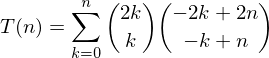

In [2]:
T = Function('T')
t_expr1 = Sum(binomial(2*k,k)*binomial(2*(n-k),n-k),(k,0,n))
t_rec1 = Eq(T(n), t_expr1)
Tn1 = Lambda([n],t_expr1)
t_rec1

Viene definita la funzione ausiliaria $P(n)$ necessaria la dimostrare la prima identità

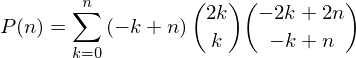

In [3]:
P = Function('P')
p_expr1 = Sum((n-k)*binomial(2*k,k)*binomial(2*(n-k),n-k),(k,0,n))
p_rec1 = Eq(P(n),p_expr1)
Pn1 = Lambda([n], p_expr1)
p_rec1

Si osservi che vale la seguente relazione 

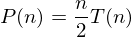

In [4]:
p_rec2 = Eq(P(n),(n*T(n))/2)
p_rec2 

Che si può verificare numericamente

In [5]:
[(n,Pn1(n).doit() - (n*Tn1(n).doit())/2) for n in range(0,11)]

Si noti che per $k=n$ il valore della somma vale $0$ e quindi vale la seguente uguaglianza

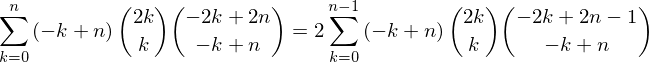

In [6]:
p_expr2 = 2*Sum((n-k)*binomial(2*k,k)*binomial(2*(n-k)-1,n-k),(k,0,n-1))
p_rec2 = Eq(p_expr1,p_expr2)
Pn2 = Lambda([n],p_expr2)
p_rec2

Verificandolo numericamente

In [7]:
[(n,Pn1(n).doit() - Pn2(n).doit()) for n in range(0,11)]

Il prossimo passo consiste nel portare fuori dal coefficiente binomiale gli ultimi termini

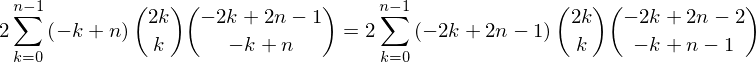

In [8]:
p_expr3 = 2*Sum((2*(n-k)-1)*binomial(2*k,k)*binomial(2*(n-k-1),n-1-k),(k,0,n-1))
p_rec3 = Eq(p_expr2,p_expr3)
Pn3 = Lambda([n],p_expr3)
p_rec3

La verifica numerica rivela che

In [9]:
[(n,Pn2(n).doit() - Pn3(n).doit()) for n in range(0,11)]

Svolgendo il prodotto ed eseguendo la somma si ha che 

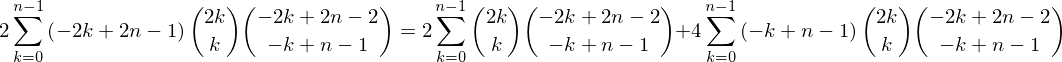

In [10]:
p_expr4 = 4*Sum((n-1-k)*binomial(2*k,k)*binomial(2*(n-1-k),n-1-k),(k,0,n-1))+2*Sum(binomial(2*k,k)*binomial(2*(n-1-k),n-1-k),(k,0,n-1))
p_rec4 = Eq(p_expr3,p_expr4)
Pn4 = Lambda([n],p_expr4)
p_rec4

Eseguendo la verifica numerica

In [11]:
[(n,Pn3(n).doit() - Pn4(n).doit()) for n in range(0,11)]

Quindi valgono le seguenti relazioni

In [12]:
p_rec5 = Eq(P(n),4*P(n-1)+2*T(n-1))
p_rec5

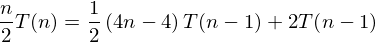

In [13]:
t_rec2 = Eq((n/2)*T(n),(4*(n-1)*T(n-1))/2+2*T(n-1))
t_rec2

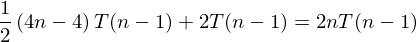

In [14]:
t_rec2 = Eq((4*(n-1)*T(n-1))/2+2*T(n-1),2*n*T(n-1))
t_rec2

In [15]:
t_rec3 = Eq(T(n),4*T(n-1))
t_rec3,Eq(T(0),1)

Tenendo presente che $T(0)=1$ si può concludere

In [16]:
t_rec4 = Eq(T(n),4**n)
Tn4 = Lambda([n],4**n)
t_rec4

La verifica numerica conferma quanto scritto

In [17]:
[(n,Tn1(n).doit() - Tn4(n).doit()) for n in range(0,11)]

<h3>Caso 2</h3>

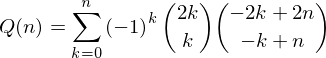

In [18]:
Q = Function('Q')
q_expr1 = Sum((-1)**k*binomial(2*k,k)*binomial(2*(n-k),n-k),(k,0,n))
q_rec1 = Eq(Q(n), q_expr1)
Qn1 = Lambda([n],q_expr1)
q_rec1

Si può verificare numericamente che $Q(2n+1)=0$, infatti:

In [19]:
[(2*n+1,Qn1(2*n+1).doit()) for n in range(0,11)]

Si consideri la seguente funzione ausiliaria $H(n)$:

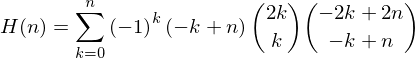

In [20]:
H = Function('H')
h_expr1 = Sum((-1)**k*(n-k)*binomial(2*k,k)*binomial(2*(n-k),n-k),(k,0,n))
h_rec1 = Eq(H(n), h_expr1)
Hn1 = Lambda([n],h_expr1)
h_rec1

Allora si ha che $H(2n)=nQ(2n)$. Verificandolo numericamente:

In [21]:
[(2*n, n*Qn1(2*n).doit() - Hn1(2*n).doit()) for n in range(0,11)]

Seguendo l'approccio seguito nel caso precedente si ha che 

In [22]:
h_rec2 = Eq(H(n),4*H(n-1)+2*Q(n-1))
h_rec2

Infatti si ha che

In [23]:
[(n, Hn1(n).doit() - 4*Hn1(n-1).doit()-2*Qn1(n-1).doit()) for n in range(0,11)]

Quindi, riscrivendo la relazione precedente per $2n$ e $2n-1$si ha che 

In [24]:
h_rec3 = Eq(H(2*n),4*H(2*n-1)+2*Q(2*n-1))
h_rec4 = Eq(h_rec3,4*H(2*n-1))
h_rec4

In [25]:
h_rec5 = Eq(H(2*n-1),4*H(2*n-2)+2*Q(2*n-2))
h_rec5

E quindi 

In [26]:
h_rec6 = Eq(H(2*n),16*H(2*n-2)+8*Q(2*n-2))
h_rec6

e tenendo conto che $H(2n)=nQ(2n)$

In [27]:
q_rec2 = Eq(n*Q(2*n),16*(n-1)*Q(2*n-2)+8*Q(2*n-2))
q_rec3 = Eq(q_rec2,8*(2*n-1)*Q(2*n-2))
q_rec3

Da cui 

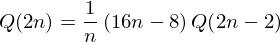

In [28]:
q_rec4 = Eq(Q(2*n),(8*(2*n-1)*Q(2*n-2))/n)
q_rec4

prima di scrivere $Q(2n)$ in forma esplicita è possibile verificare numericamente la precedente relazione

In [29]:
[(2*n, Qn1(2*n).doit() - (1/n)*(16*n-8)*Qn1(2*n-2).doit()) for n in range(1,11)]

Quindi, considerando che $Q(0)=1$, si ha che 

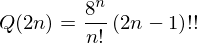

In [30]:
q_expr2 = ((8**n)*factorial2(2*n-1))/factorial(n)
q_rec5 = Eq(Q(2*n), q_expr2)
Qn2 = Lambda([n],q_expr2)
q_rec5

Quindi, confrontando numericamente questa espressione per $Q(2n)$ con quella di partenza si ha

In [31]:
[(2*n, Qn1(2*n).doit() - Qn2(n).doit()) for n in range(1,11)]

Poiché $\frac{8^n}{n!}(2n-1)=\frac{8^n}{n!}(2n-1)(\frac{2^n n!}{2^n n!})=\frac{4^n(2n-1)!!(2n)!!}{(n!)^2} = \frac{4^nn!}{(n!)^2}=4^n\binom{2n}{n}$

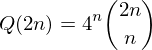

In [32]:
q_expr3 = (4**n)*binomial(2*n,n)
q_rec6 = Eq(Q(2*n), q_expr3)
Qn3 = Lambda([n],q_expr3)
q_rec6

Eseguendo una nuova verifica numerica si ha che

In [33]:
[(2*n, Qn1(2*n).doit() - Qn3(n).doit()) for n in range(1,11)]

<h3>Caso 3</h3>

Sia $$S(n,t)=\sum_{\substack{i_1+i_2+\dots+i_t=n \\ i_1 \geq 0,i_2 \geq 0,\dots,i_t \geq 0}}^{n}\binom{2i_1}{i_1}\binom{2i_2}{i_2} \dots \binom{2i_t}{i_t}$$ allora per poter calcolare i valori numerici che assume $S(n,t)$ è necessario determinare le composizioni di $n$ di lunghezza $\leq t$. A questo scopo è stato implementato il seguente metodo

In [37]:
import itertools

def compositions(n, k):
    for c in itertools.combinations(range(n+k-1), k-1):
        yield [b-a-1 for a, b in zip((-1,)+c, c+(n+k-1,))]

Questo metodo definisce un generatore in cui ogni elemento è una lista di di $t$ elementi che rappresenta una delle possibili combinazioni di indici $i_1,i_2,\dots,i_t$ su cui itera la sommatoria che definisce $S(n,t)$. Questa procedura verrà utilizzata all'interno del seguente metodo per calcolare il valore numerico di $S(n,t)$.

In [43]:
def computeS(n,t):
    S = 0
    comp = compositions(n,t)
    for c in comp:
        binomials = [((factorial(2*c[i]))/((factorial(c[i]))*(factorial(c[i])))) for i in range(0,len(c))]
        product = np.prod(binomials)
        S = S + product
    return S
        

A questo punto è possibile utilizzare il metodo sviluppato in python per effettuare le valutazioni numeriche con sympy definendo una funzione lambda

In [44]:
S = implemented_function(Function('S'), computeS)
Sn1 = lambdify((n,t),S(n,t))

Seguendo l'approccio utilizzato nei due casi precedenti viene definita una funzione ausiliaria, chiamata $P(n,t)$
$$P(n,t) = \sum_{\substack{i_1+i_2+\dots+i_t=n \\ i_1 \geq 0,i_2 \geq 0,\dots,i_t \geq 0}}^{n}i_1\binom{2i_1}{i_1}\binom{2i_2}{i_2} \dots \binom{2i_t}{i_t}$$

che è definibile equivalentemente come 
$$P(n,t) = \sum_{\substack{i_1+i_2+\dots+i_t=n \\ i_k \geq 0,i_2 \geq 0,\dots,i_t \geq 0}}^{n}i_k\binom{2i_1}{i_1}\binom{2i_2}{i_2} \dots \binom{2i_t}{i_t}$$
con $k \in \{1,2,\dots,t\}.$


Per poter calcolare il valore di $P(n,t)$ viene utilizzato un approccio analogo 
a quello utilizzato per $S(n,t)$ definendo il metodo apposito

In [52]:
def computeP(n,t):
    S = 0
    comp = compositions(n,t)
    for c in comp:
        binomials = [((factorial(2*c[i]))/((factorial(c[i]))*(factorial(c[i])))) for i in range(0,len(c))]
        product = np.prod(binomials)*c[0]
        S = S + product
    return S

In [55]:
P = implemented_function(Function('S'), computeP)
Pn1 = lambdify((n,t),P(n,t))

Quindi vale $P(n,t) = \frac{nS(n,t)}{t}$

che si può verificare numericamente 

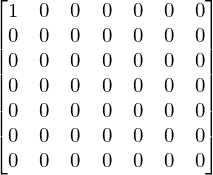

In [72]:
matrix = eye(7)
for i in range(1,7): 
    for j in range(1,7):
        matrix[i,j] = ((i*Sn1(i,j))/j)-Pn1(i,j)
matrix

inoltre si può verificare numericamente che $P(n,t)=4P(n-1,t)+2S(n-1,t)$ 

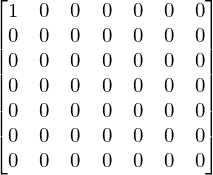

In [75]:
matrix = eye(7)
for i in range(1,7): 
    for j in range(1,7):
        matrix[i,j] = Pn1(i,j) - 4*Pn1(i-1,j) - 2*Sn1(i-1,j)
matrix

tenendo conto che $\frac{nS(n,t)}{t} = 4\frac{(n-1)S(n-1,t)}{t}+ 2S(n-1,t)=\frac{2(2(n-1)+t)S(n-1,t)}{t}$

e quindi $S(n,t)=\frac{2(2(n-1)+t)}{n}S(n-1,t)$

Tenendo conto che si ha $S(0,1)=1$ allora 
$$S(n,t) = 2^n\frac{(2n-2+t)(2n-4+t) \dots (2+t)t}{n!}$$

Quindi, se $t=2t_1$ si ha che 
$$
S(n,2t_1) = 4^n \frac{(n-1+t_1)(n-2+t_1) \dots (1+t_1)t_1}{n!} = 4^n \frac{(n-1+t_1)!}{n!(t_1-1)!}
$$

E quindi $$S(n,2t_1)= 4^n\binom{n+t_1-1}{n}$$

e quindi se $t$ è pari $$S(n,t) = 4^n\binom{n+\frac{t}{2}-1}{n}$$

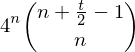

In [80]:
s_expr1 = 4**n*binomial(n+t/2-1,n)
Sn2 = Lambda([n,t],s_expr1)
Sn2(n,t)

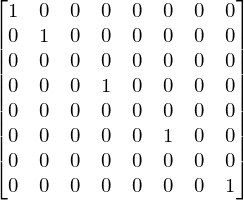

In [85]:
matrix = eye(8)
for i in range(1,8): 
    for j in range(2,8,2):
        matrix[i,j] = Sn1(i,j) - Sn2(i,j)
matrix

Nel caso in cui $t=2t_1+1$, ovvero se t è dispari si ha che 
$$ 
S(n,2t_1+1)=\binom{2n+2t_1}{2n} \binom{2n}{n} \frac{1}{\binom{n+t_1}{n}}
$$

che si può verificare numericamente 

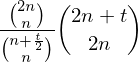

In [87]:
s_expr2 = binomial(2*n+t,2*n)*binomial(2*n,n)*(1/binomial(n+(t/2),n))
Sn3 = Lambda([n,t],s_expr2)
Sn3(n,t)

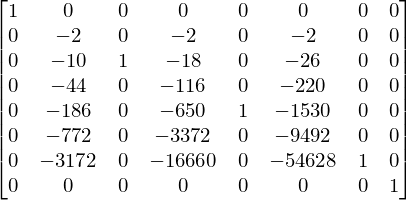

In [89]:
matrix = eye(8)
for i in range(1,7): 
    for j in range(1,7,2):
        matrix[i,j] = Sn1(i,j) - Sn3(i,j)
matrix